# **Recommendation System**

# Recoomender System

- Recommender System is a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.
- In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis.



### Problem statement
>Build a hybrid movie recommender system that combines user ratings  and content of the movies.



### Motivations
In a world in which we heavily rely more and more over time on online platforms and applications such as Netflix, Amazon, Spotify etc. we are finding ourselves having to constantly choose from a wide range of options. 

One may think that having many options is good thing, as opposed to having very few, but an excess of options can lead to what is known as "decision paralysis". As Barry Schwartz writes in The Paradox of Choice:

"*A large array of options may discourage consumers because it forces an increase in the effort that goes into making a decision. So consumers decide not to decide, and don't buy the product. Or if they do, the effort that the decision requires detracts from the enjoyment derived from the results*"

Also resulting in another, more subtle, negative effect:

"*A large array of options may diminish the attractiveness of what people actually choose, the reason being that thinking about the attractions of some of the unchosen options detracts from the pleasure derived from the chosen one.*"

An obvious consequence of this, is that we end up not making any effort in scrutinising among multiple options unless it is made easier for us, in other words, unless these are filtered according to our preferences. 

This is why recommender systems have become a crucial component in platforms as the aforementioned, in which users have a myriad range of options available. Their success will heavily depend on their ability to narrow down the set of options available making it easier for us to make a choice. 

A major drive in the field is Netflix, which is continuously advancing the state-of-the-art in the field through research and by having sponsored the Netflix Prize between 2006 to 2009 which hugely energised research in the field.

And obciously, the Netflix's recommender has a huge presence in the platform. When we search for a movie, we immediately get a selection of similar movies which we are likely to enjoy too:


### Types of recommender systems

Most recommender systems make use of either or both collaborative filtering and content based filtering. Though current recommender systems typically combine several approaches into a hybrid system. 

Below is a general overview of these methods:

* **Collaborative filtering**: The main idea behind these methods is to use other users’ preferences and taste to recommend new items to a user. The usual procedure is to find similar users (or items) to recommend new items which where liked by those users, and which presumably will also be liked by the user being recommended.

* **Content-Based**: Content based recommenders will instead use data exclusively about the items. For this we need to have a minimal understanding of the users’ preferences, so that we can then recommend new items with similar tags/keywords to those specified (or inferred) by the user.

* **Hybrid methods**: Which, as the name suggests, include techniques combining collaborative filtering, content based and other possible approaches. Nowadays most recommender systems are hybrid, as is the case of factorization machines.

## The MovieLens Dataset

One of the most used datasets to test recommender systems is the **MovieLents** dataset, which contains rating data sets from the MovieLens web site. For this blog entry I'll be using a dataset containing 1M anonymous ratings of approximately 4000 movies made by 6000 MovieLens users,  released in 2/2003.

Let's get a glimpse of the data contained in this dataset. We have three .csv files: ratings, users, and movies. The filed will be loaded as pandas dataframes. We have a ratings file which looks like:

# **Movielens Data Exploration**

## Libraries

In [2]:
# Data manipulation   
import re
import pandas as pd
import numpy as np

# Data visualization
import matplotlib
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS 
from matplotlib import pyplot as plt
from termcolor import colored

from itertools import combinations

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import datetime


# import statements
import sys

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import linear_kernel 
from surprise import Reader, Dataset, SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import NormalPredictor
import random
import numpy as np
import os
import csv
import re

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV

from collections import defaultdict
import numpy as np
from surprise.model_selection import cross_validate
from MovieLens_EDA import MovieLens_EDA
from MovieLens import MovieLens
from ContentKNNAlgorithm import ContentKNNAlgorithm
from HybridAlgorithm import HybridAlgorithm
from Evaluator import Evaluator


In [5]:
#importing visualization libraries
sns.set_theme(style='darkgrid', context='talk')
#sns.set_theme(style='white', context='talk')

#sns.set(font_scale = 1)
##plt.rcParams["axes.grid"] = False
#plt.style.use('dark_background')
%matplotlib inline

## 1.Loading the Dataset

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/My Drive/Colab Notebooks/Final_Project/data100k/'

In [7]:
eda = MovieLens_EDA()

In [9]:
movies, ratings, links, tags = eda.load_MovieLens()

## 2.Exploratory Data Analysis

### 2.1.Movies Data

In [9]:
# First of all let's look at first few entries from users data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies['release_year'] = movies['title'].apply(eda.release_year)
movies.head()

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


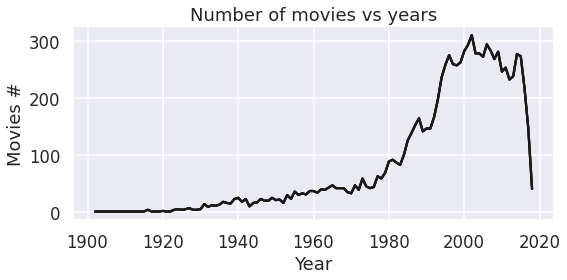

In [11]:
non_0_movies = movies[movies['release_year']!=0]
plt.subplots(figsize=(8,4))
plt.plot(non_0_movies.groupby(['release_year']).count(),'k')
plt.title('Number of movies vs years')
#plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Movies #')
plt.tight_layout()

The picture shows that there is a great increment of the movies after 2009.


In [12]:
print('Unique genres:\n', eda.get_unique_genres(movies))

Unique genres:
 ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [13]:
# Creating dummy column for each column with boolean values
df_movie = movies.copy()
#df_movie = df_movie.join(df_movie.genres.str.get_dummies().astype(bool))
#df_movie.drop('genres', inplace=True, axis=1)

In [ ]:
#df_movie.head(2)

In [14]:
print('# of unique movie release years:', df_movie.release_year.nunique())

# of unique movie release years: 107


In [15]:
unique_release_years = df_movie.release_year.unique()
unique_release_years.sort()
print(unique_release_years)

[   0 1902 1903 1908 1915 1916 1917 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018]


As shown above, there are movies without release year and there are details of 62423 movies with release years from 1874 to 2019.

In [16]:
# Find the number of movies that do not have release year
movies_0_years = df_movie[df_movie['release_year']==0]['release_year'].count()
print('The number of movies without release year =',movies_0_years)

The number of movies without release year = 13


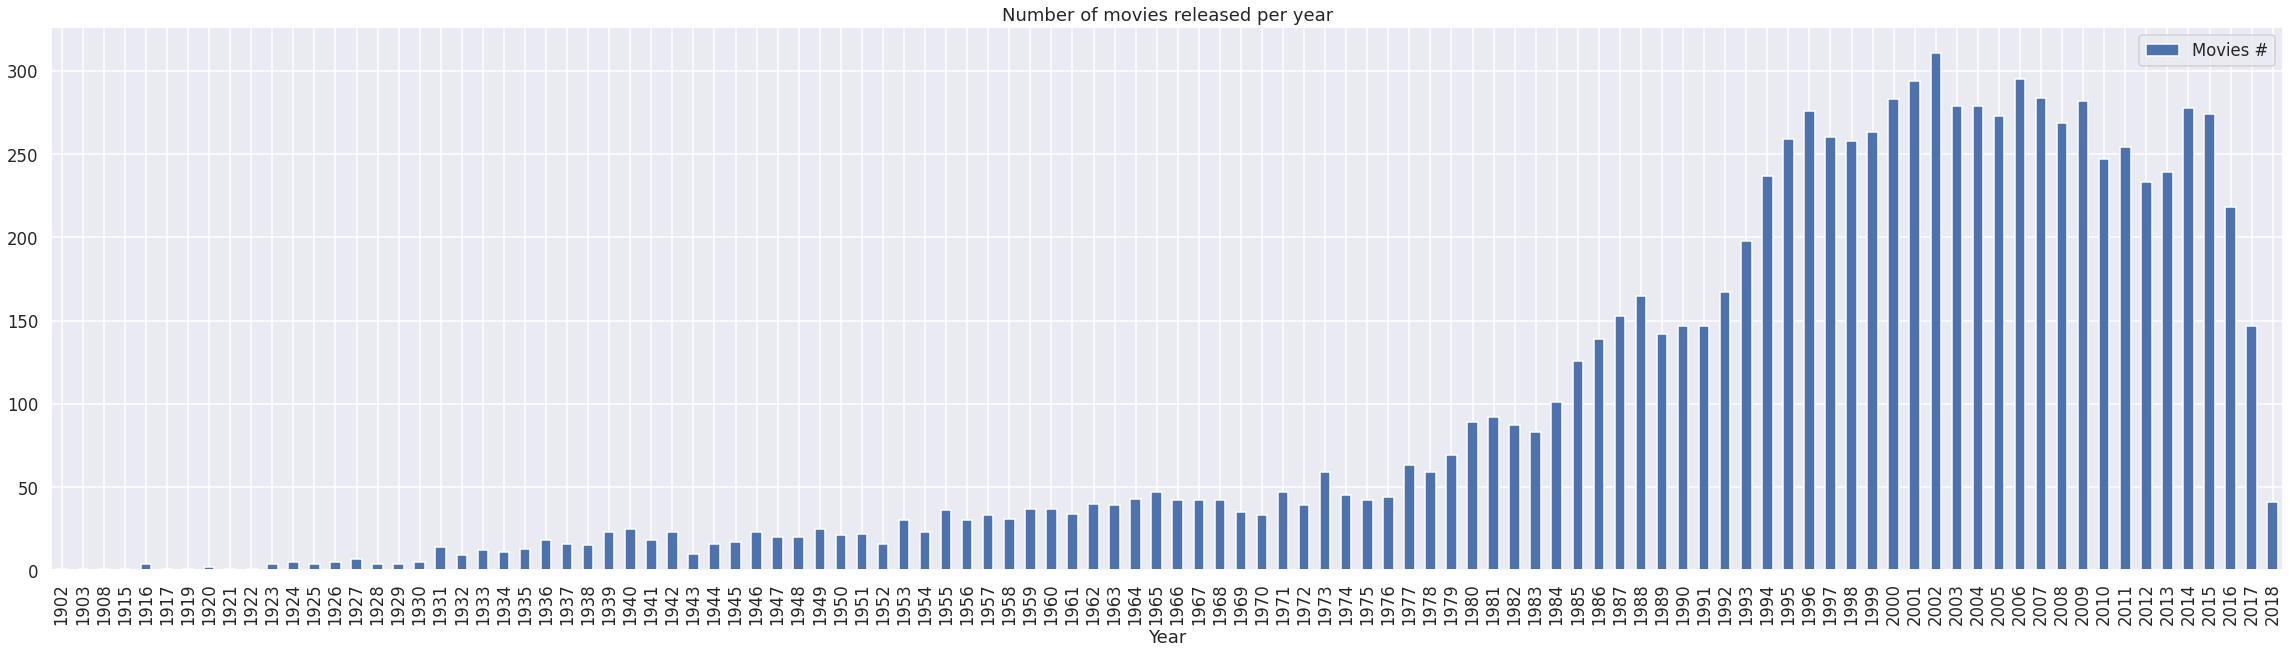

In [17]:
df_temp = df_movie[(df_movie['release_year'] != 0)]
eda.plot_movies_per_year(df_temp, size = (40,10))

### 2.2.Rating Data

In [ ]:
ratings.head()
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Let's look at the some more details of this dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings = eda.timestamp_convert(ratings)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp,year,month,date
0,429,595,5.0,1996-03-29 18:36:55,1996,3,1996-03-29
1,429,588,5.0,1996-03-29 18:36:55,1996,3,1996-03-29
2,429,590,5.0,1996-03-29 18:36:55,1996,3,1996-03-29
3,429,592,5.0,1996-03-29 18:36:55,1996,3,1996-03-29
4,429,432,3.0,1996-03-29 18:36:55,1996,3,1996-03-29


In [ ]:
eda.ratings_statistics(ratings)

Summary of some statistics for ratings dataset:

The ratings are distributed over 23 years from 1996 to 2018 as follows:
Years: [1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Number of unique users: 610

Number of unique movies: 9724

Unique ratings: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]

Lowest rating: 0.5

Highest rating: 5.0

Average rating: 3.5

Frequency of each rating:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


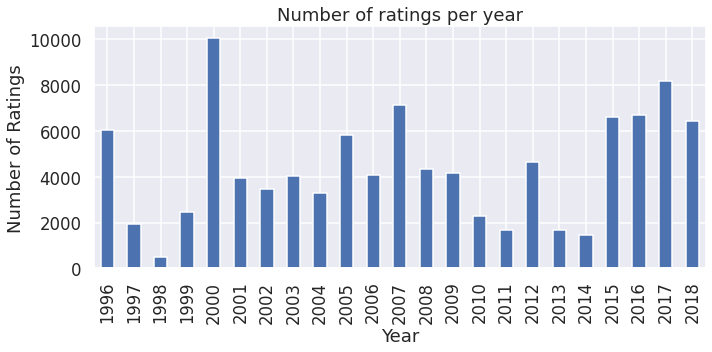

In [ ]:
# Now, let's see how the number of ratings for each year
ratings[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(
    x='year', y='rating', title='Number of ratings per year', figsize=(10, 5),legend=False)
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.tight_layout()

We can see that most number of ratings are available for the years 2016 followed by 2000.

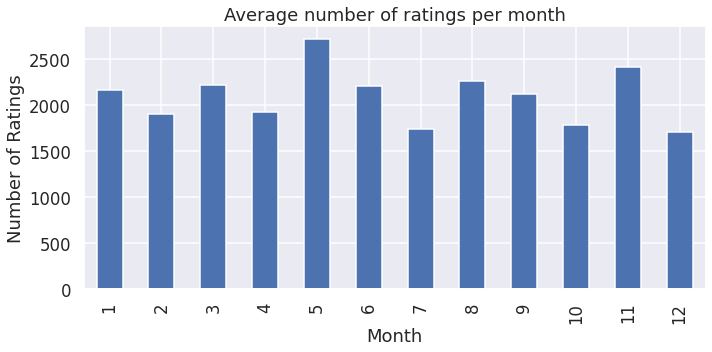

In [ ]:
# Now have a look at the average monthly distribution of rating
df_temp = ratings[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 4
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5),legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.tight_layout()

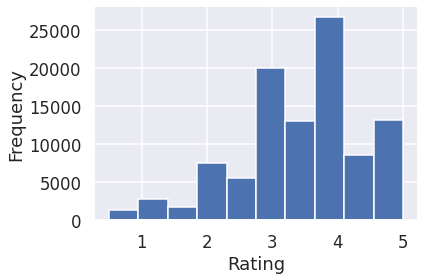

In [ ]:
# Now let's see the distribution of different rating values. This will give an idea of common rating behaviour of users.
ratings['rating'].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()

We can see that most common rating value is 4.

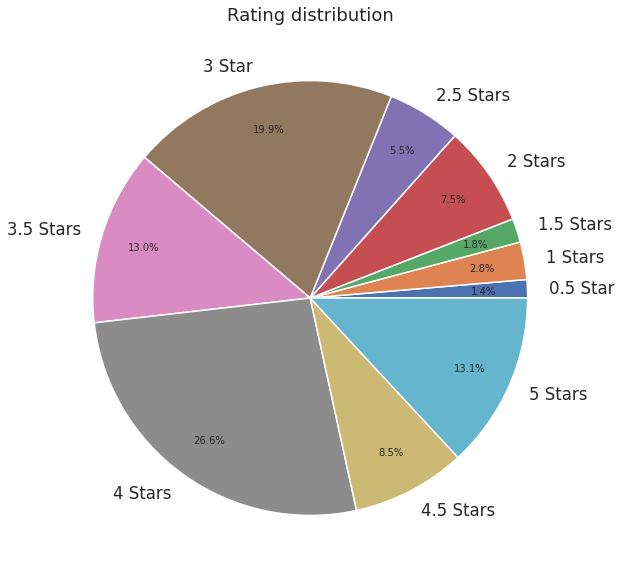

In [18]:
df = ratings.merge(movies, on='movieId', how='inner')
eda.rating_des(df) 

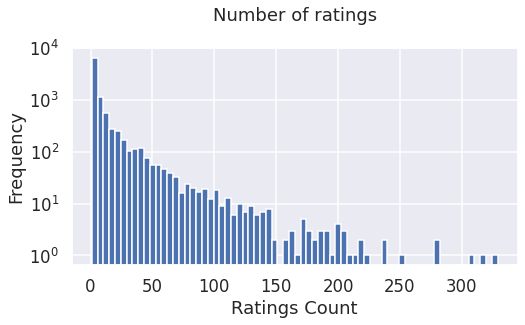

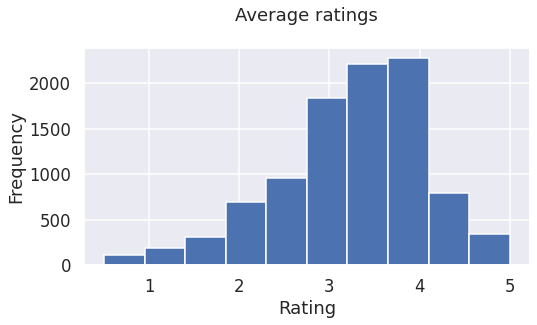

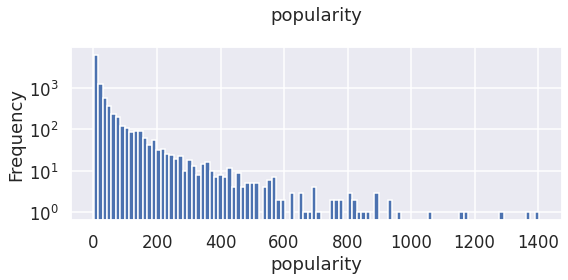

,rating,rating_counts,popularity
title,,,
"Shawshank Redemption, The (1994)",4.429022,317,1404.0
Forrest Gump (1994),4.164134,329,1370.0
Pulp Fiction (1994),4.197068,307,1288.5
"Matrix, The (1999)",4.192446,278,1165.5
"Silence of the Lambs, The (1991)",4.161290,279,1161.0
Star Wars: Episode IV - A New Hope (1977),4.231076,251,1062.0
Braveheart (1995),4.031646,237,955.5
Fight Club (1999),4.272936,218,931.5
Schindler's List (1993),4.225000,220,929.5


In [22]:
# Extract and display the 10 most popular films in the dataset 
ratings_mean_count = eda.avg_rating(df)
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(15)

In [ ]:
#ratings['rating'].hist(by=ratings['year'], figsize=(10, 8));

In [ ]:
#Now let's focus on the users. We have seen that there are 162541 unique users.
# Let's see top 10 users based on number of ratings.
top_10_users = ratings.groupby(['userId'])['rating'].count().sort_values(axis=0,ascending=False).reset_index()
top_10_users.head(10)

,userId,rating
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
5,610,1302
6,68,1260
7,380,1218
8,606,1115
9,288,1055


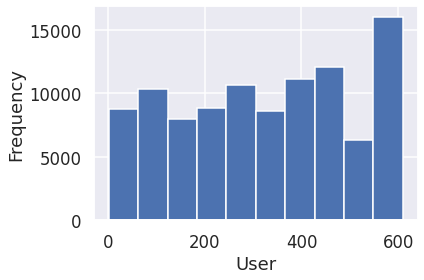

In [ ]:
#plt.hist(ratings['userId'], log=True);
plt.hist(ratings['userId'])
plt.xlabel('User')
plt.ylabel('Frequency')
plt.tight_layout()

In [23]:
df = movies.merge(ratings)
eda.weighted_average_score(df).head(10)

,title,genres,rating,views
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251
2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218
527,Schindler's List (1993),Drama|War,4.225000,220
858,"Godfather, The (1972)",Crime|Drama,4.289062,192


In [24]:
# Which are the most popular genres?
genre_popularity = (movies.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: genres, dtype: int64

(-0.5, 999.5, 399.5, -0.5)

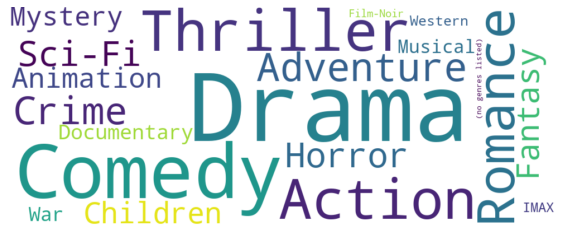

In [25]:
from wordcloud import WordCloud 
genre_wc = WordCloud(width=1000,height=400, background_color='white')
genre_wc.generate_from_frequencies(genre_popularity.to_dict())

plt.figure(figsize=(10, 8))
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis('off')

In [ ]:
a = ratings['userId'].value_counts()
a

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [ ]:
#ratings['userId'].value_counts().hist(bins=80,figsize=(10, 10))

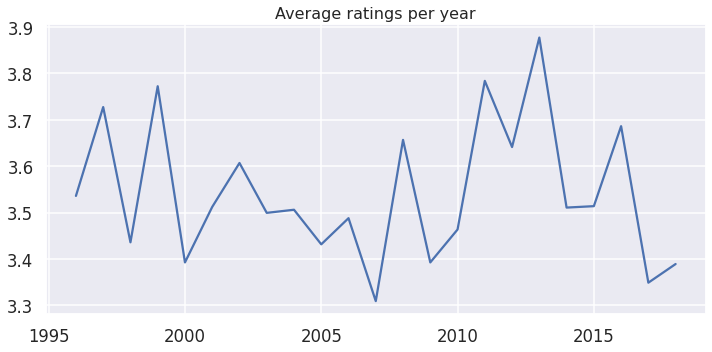

In [ ]:
# Next, we calculate the average rating over all movies in each year.
avg_rates_year = ratings[['year','rating']].groupby('year').mean()
plt.subplots(figsize=(10,5))
plt.plot(avg_rates_year)
plt.title('Average ratings per year',fontsize=16)
#plt.grid(True)
plt.tight_layout()
#fig.savefig('Number of Movies and average ratings VS years.jpg')
#the average ratings over all movies in each year vary not that much, just from 3.40 to 3.75

### 2.3.Links Data

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.000
1,2,113497,8844.000
2,3,113228,15602.000
3,4,114885,31357.000
4,5,113041,11862.000


### 2.4.Tags Data

- Tags are user-generated metadata about movies. 
- Each tag is typically a single word or short phrase. 
- The meaning, value, and purpose of a particular tag is determined by each user.

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
tags = eda.timestamp_convert(tags)

In [ ]:
tags.head()

,userId,movieId,tag,timestamp,year,month,date
0,474,3181,Shakespeare,2006-01-13 19:09:12,2006,1,2006-01-13
1,474,6912,Rita Hayworth can dance!,2006-01-13 19:09:31,2006,1,2006-01-13
2,474,2494,Hungary,2006-01-13 19:10:26,2006,1,2006-01-13
3,474,2494,Holocaust,2006-01-13 19:10:26,2006,1,2006-01-13
4,474,1836,No DVD at Netflix,2006-01-13 19:10:44,2006,1,2006-01-13


In [ ]:
eda.tags_statistics(tags)

Summary of some statistics for tags dataset:

The tags are distributed over 13 years from 2006 to 2018 as follows:
Years: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Number of unique users: 58

Number of unique movies: 1572

Number of unique tags : 1589


In [ ]:
#ratings['year']=ratings['timestamp'].apply(convert_time)

In [ ]:
#ratings.head()

In [47]:
#Next we extract all genres for all movies. That is, for a given genre, we would like to know which movies belong to it.
#First, we split the genres for all movies.
def genres_str(x):
    if x=='(no genres listed)':
        keys=['no_genres']
    else:
        keys= re.sub('[|]', ' ', x)
        keys=keys.split()
    return keys

In [48]:
movies['genres_split'] = movies['genres'].apply(genres_str)

In [49]:
movies.sample(10)

,movieId,title,genres,release_year,genres_split
371,427,Boxing Helena (1993),Drama|Mystery|Romance|Thriller,1993,"[Drama, Mystery, Romance, Thriller]"
6563,55067,Requiem (2006),Drama|Thriller,2006,"[Drama, Thriller]"
1462,1985,Halloween 4: The Return of Michael Myers (1988),Horror,1988,[Horror]
782,1024,"Three Caballeros, The (1945)",Animation|Children|Musical,1945,"[Animation, Children, Musical]"
3387,4610,"January Man, The (1989)",Comedy|Crime|Mystery|Thriller,1989,"[Comedy, Crime, Mystery, Thriller]"
6926,64716,Seven Pounds (2008),Drama,2008,[Drama]
9382,163386,Winnie the Pooh and the Day of Concern (1972),Animation,1972,[Animation]
1331,1801,"Man in the Iron Mask, The (1998)",Action|Adventure|Drama,1998,"[Action, Adventure, Drama]"
1380,1891,"Ugly, The (1997)",Horror|Thriller,1997,"[Horror, Thriller]"
8659,121007,Space Buddies (2009),Adventure|Children|Fantasy|Sci-Fi,2009,"[Adventure, Children, Fantasy, Sci-Fi]"


In [53]:
all_genres = eda.get_unique_genres(movies).tolist()
all_genres[-1] = 'no_genres'
all_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 'no_genres']

In [54]:

#genres_classify[genre] gives the moviesIds which can be classified to be genre.
values=[]
for i in range(len(all_genres)):
    values.append([])
genres_classify=dict(zip(all_genres, values))
 
for i in range(movies.shape[0]):
     for genre in movies.loc[i,'genres_split']:
         genres_classify[genre].append(movies.loc[i,'movieId'])

In [55]:
#Now we can consider the  distributions of the ratings for each genre
data=[]
for g in all_genres:
    #sub is all ratings for the movies in the genres g.
    sub=np.array(ratings[ratings['movieId'].isin(genres_classify[g])].rating)
    data.append(sub)

In [56]:
# Next we make ranks by the number of movies in different genres and the number of ratings for all genres.
import operator
common={}
for g in genres_classify:
  common[g]=len(genres_classify[g])
common_sort= sorted(common.items(), key=operator.itemgetter(1))
#common_sort= sorted(common.items(), key=operator.itemgetter(1)) & amp;amp;amp;amp;nbsp;
common_pd=pd.DataFrame(common.items(),columns=['genre', 'numbers'])
common_pd.head()

,genre,numbers
0,Adventure,1263
1,Animation,611
2,Children,664
3,Comedy,3756
4,Fantasy,779


In [57]:
popular={}
i=0
for g in genres_classify:
 popular[g]=len(data[i])
 i+=1
popular_sort= sorted(popular.items(), key=operator.itemgetter(1))
popular_pd=pd.DataFrame(popular.items(),columns=['genre', 'number of ratings'])
summary_genre=popular_pd.merge(common_pd,on='genre',how='inner')

In [58]:
summary_genre

,genre,number of ratings,numbers
0,Adventure,24161,1263
1,Animation,6988,611
2,Children,9208,664
3,Comedy,39053,3756
4,Fantasy,11834,779
5,Romance,18124,1596
6,Drama,41928,4361
7,Action,30635,1828
8,Crime,16681,1199
9,Thriller,26452,1894


In [59]:
popular_pd.head()

,genre,number of ratings
0,Adventure,24161
1,Animation,6988
2,Children,9208
3,Comedy,39053
4,Fantasy,11834


In [60]:
summary_genre.head()

,genre,number of ratings,numbers
0,Adventure,24161,1263
1,Animation,6988,611
2,Children,9208,664
3,Comedy,39053,3756
4,Fantasy,11834,779


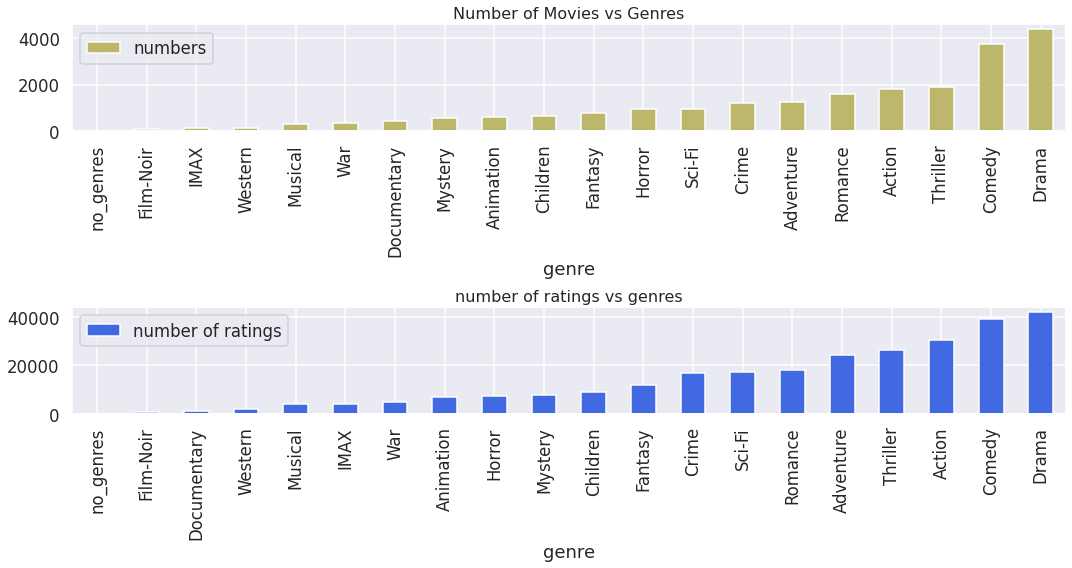

In [61]:
sort_1=summary_genre.sort_values(by='numbers')
sort_2=summary_genre.sort_values(by='number of ratings')
 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
 
a1=sort_1.plot.bar(x='genre',y='numbers',ax=ax1,color='darkkhaki')
a1.set_title('Number of Movies vs Genres',fontsize=16)
plt.grid(True)
 
a2=sort_2.plot.bar(x='genre',y='number of ratings',ax=ax2,color='royalblue')
a2.set_title('number of ratings vs genres',fontsize=16)
plt.grid(True)
plt.tight_layout()
 
#fig.savefig('Number of Movies and Number of Ratings by genres.jpg')
#plt.show()

In [65]:
#eda.genre_count(movies)

Movie genres
How many different genres are represented in the dataset and how are they distributed?

Observations:

There are 19 unique genres
5062 films have no genre listed which accounts for 5% of the films in the dataset
Majority of the films fall into the drama, comedy and thriller genres.
Dramas account for 23%
Comedies makes up 15% of the films
8% of the films fall into the thriller genre
The Imax genre accounts for the smallest portion of the films in the dataset at less than 1% since this is a relatively new genre and the dataset goes back 50 years

In [66]:
eda.sparsity(ratings)

number of users: 610
number of movies: 9724
sparsity level is 98.3%


- High sparsity levels pose a big challenge to the quality of predictions, as well as to the number of predictions that a recommender system can actually compute.

- Because of sparsity, the confidence of predicted ratings may be questionable, since they are based on a rather little amount of evidence.

- Data sparsity refers to the difficulty in finding sufficient reliable similar users since in general the active users only rated a small portion of items.

- Cold start refers to the difficulty in generating accurate recommendations for the cold users who only rated a small number of items.

In [67]:
ratings_df = pd.read_csv(path+'ratings.csv',
    usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
movies_df = pd.read_csv(path+'movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [70]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (9742, 3)
Ratings: (100836, 4)


### Merging the imported Datasets for Analysis

In [71]:
#movies_df.info()
#ratings_df.info()
movies_merged_df=movies.merge(ratings, on='movieId')
movies_merged_df.head()

,movieId,title,genres,release_year,genres_split,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [72]:
movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

,movieId,title,genres,release_year,genres_split,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [73]:
movies_average_rating = movies_merged_df.groupby(
    'title')['rating'].mean().sort_values(
        ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.sample(5)

,title,Average Rating
951,In the Mood For Love (Fa yeung nin wa) (2000),4.214286
4305,Stage Beauty (2004),3.500000
3033,Dear Frankie (2004),3.750000
7899,Ghosts of Girlfriends Past (2009),2.500000
6624,Tommy (1975),3.000000


In [74]:
# Summarize by movie
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
movie_summary.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [75]:
movie_summary['num_ratings'] = ratings.groupby('movieId')['rating'].count()
movie_summary.head()

,rating,num_ratings
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


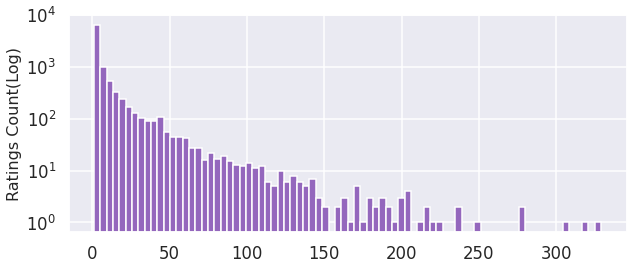

In [76]:
plt.figure(figsize=(10,4))
plt.hist(movie_summary['num_ratings'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Log)', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
#plt.savefig('ratingcounthist.jpg')

* Plot #1 confirms our observations of a high volume of movies with low ratings count. Apart from setting a threshold, we can also use quantiles at some higher percentile for this usecase.

In [77]:
# How many movies have less than 100 ratings?
(movie_summary['num_ratings'] < 100).sum()

9586

In [78]:
# how many movies have only 1 rating, could drop all these
print('num movies with 1 rating  = {}'.format((movie_summary['num_ratings'] == 1).sum()))
print('num movies with 0 ratings = {}'.format((movie_summary['num_ratings'] == 0).sum()))

num movies with 1 rating  = 3446
num movies with 0 ratings = 0


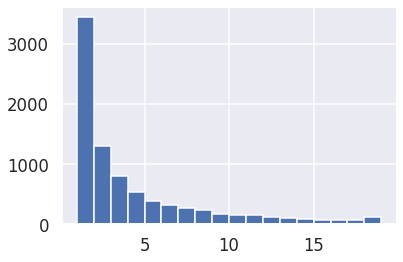

In [79]:
movie_summary[movie_summary['num_ratings'] < 20]['num_ratings'].hist(bins=18)

Text(0, 0.5, 'Average Rating')

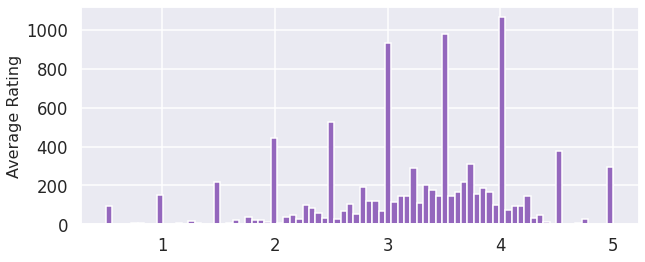

In [80]:
plt.figure(figsize=(10,4))
plt.hist(movie_summary['rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
#plt.savefig('avgratinghist.jpg')
#Histogram #2 showcases the distribution function of the Average Rating values

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


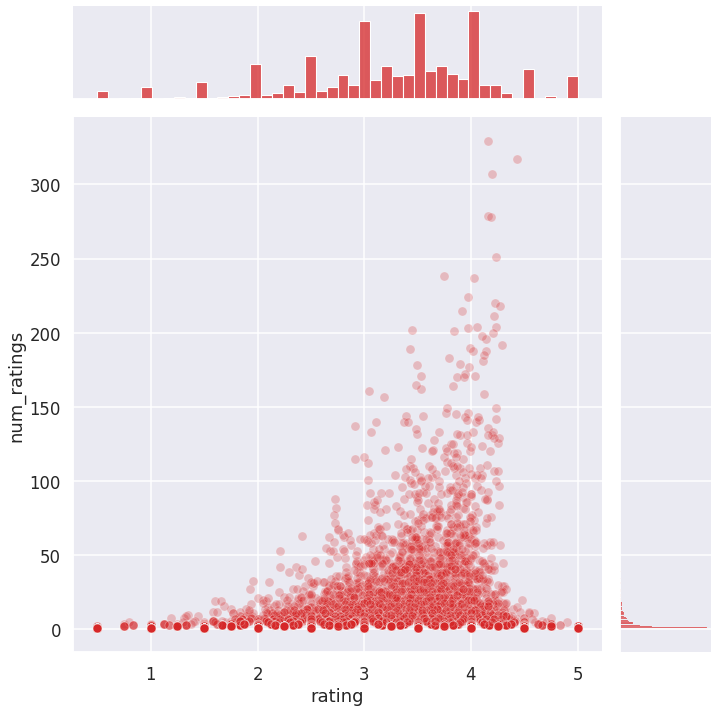

In [81]:
# Interaction between ratings and rating frequency
fig = sns.jointplot(x = 'rating',y = 'num_ratings',data=movie_summary, color='tab:red', alpha=0.25, size=10)
#plot.ax_joint.set_xscale('log')
#fig.ax_joint.set_yscale('log')

Joinplot beautifully illustrates that there is only a subset of values with higher rating that have considerable amount of ratings.

In [82]:
# Summarize by user
user_summary = pd.DataFrame(ratings.groupby('userId')['rating'].count())
user_summary.columns = ['rating_freq']
user_summary['rating_mean'] = ratings.groupby('userId')['rating'].mean()
user_summary.head()

,rating_freq,rating_mean
userId,,
1,232,4.366379
2,29,3.948276
3,39,2.435897
4,216,3.555556
5,44,3.636364


In [83]:
user_summary.describe()

,rating_freq,rating_mean
count,610.000000,610.000000
mean,165.304918,3.657222
std,269.480584,0.480635
min,20.000000,1.275000
25%,35.000000,3.360000
50%,70.500000,3.694385
75%,168.000000,3.997500
max,2698.000000,5.000000


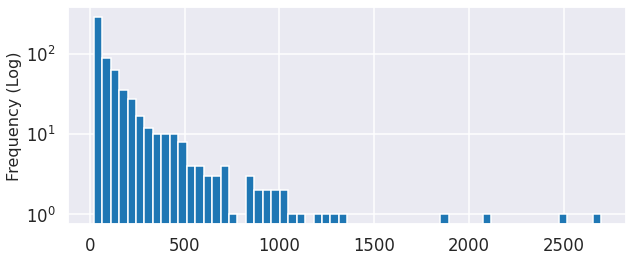

In [84]:
plt.figure(figsize=(10,4))
plt.hist(user_summary['rating_freq'],bins=60,color='tab:blue')
plt.ylabel('Frequency (Log)', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
#plt.savefig('ratingcounthist.jpg')

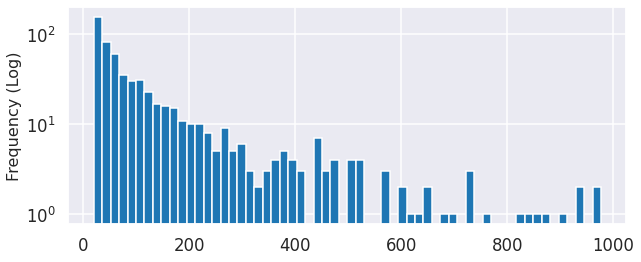

In [85]:
plt.figure(figsize=(10,4))
plt.hist(user_summary[user_summary['rating_freq'] < 1000]['rating_freq'],bins=60,color='tab:blue')
plt.ylabel('Frequency (Log)', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
#plt.savefig('ratingcounthist.jpg')

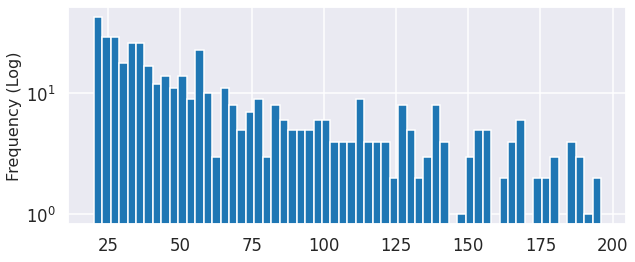

In [86]:
plt.figure(figsize=(10,4))
plt.hist(user_summary[user_summary['rating_freq'] < 200]['rating_freq'],bins=60,color='tab:blue')
plt.ylabel('Frequency (Log)', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
#plt.savefig('ratingcounthist.jpg')

Text(0.5, 0, 'Rating')

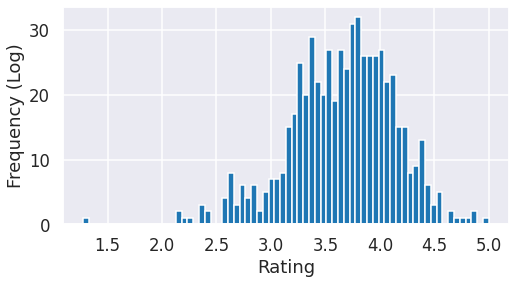

In [87]:
# Rating value
plt.figure(figsize=(8,4))
plt.hist(user_summary['rating_mean'],bins=70,color='tab:blue')
plt.ylabel('Frequency (Log)')
plt.xlabel('Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


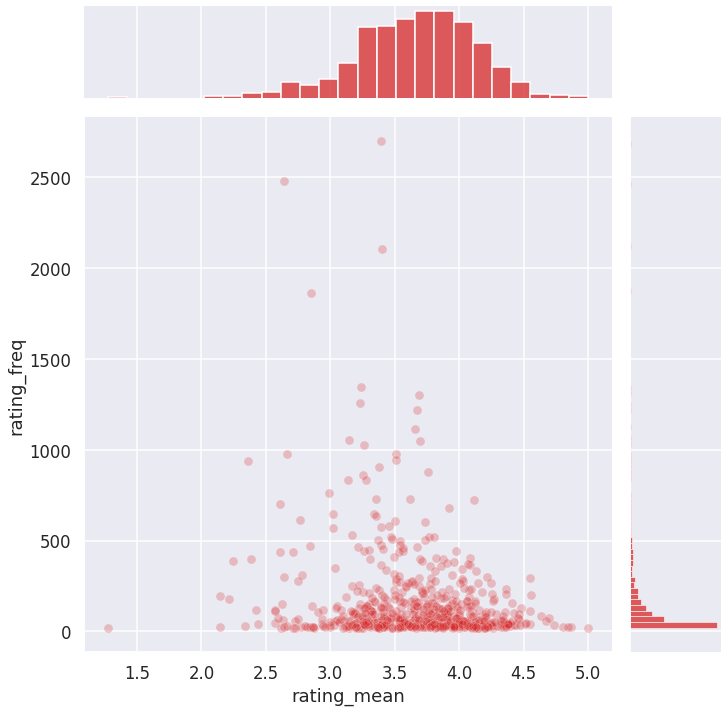

In [88]:
# Interaction between ratings and rating frequency
fig = sns.jointplot(x = 'rating_mean',y = 'rating_freq',data = user_summary, color = 'tab:red', alpha = 0.25, size = 10)
#plot.ax_joint.set_xscale('log')
#fig.ax_joint.set_yscale('log')

In [89]:
# Summarize by movie
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head(5)

,title,Rating Count,Average Rating
0,'71 (2014),1,4.0
1,Latter Days (2003),1,3.5
2,"Late Shift, The (1996)",1,2.5
3,Late Night with Conan O'Brien: The Best of Tri...,1,2.0
4,Late Night Shopping (2001),1,4.5


**Observation**- 
* Many movies have a pefrect 5 star average rating on a dataset of almost 100k user ratings. This suggests the existence of outliers which we need to further confirm with visualization.
* The presence of single ratings for several movies suggests that I set a threshold value of ratings to produce valuable recommendations

### Data Visualization
I will focus on creating plots to prove/disprove the observations and analyze the trends in the data (if any). I will stick to seaborn and matplotlib for this project.

In [ ]:
#plt.figure(figsize=(12,10))
#plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
#plot.savefig('joinplot.jpg')

* Joinplot beautifully illustrates that there is only a subset of values with higher rating that have considerable amount of ratings.

In [90]:
ratings1 = pd.merge(left=movies, right=ratings, on='movieId', how="right")
ratings1.head()

,movieId,title,genres,release_year,genres_split,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [91]:
# Explore Popular and Niche Movies
popularity = pd.DataFrame(ratings1[['userId', 'title', 'movieId']].groupby(['title', 'movieId']).agg(['count']))
popularity.reset_index(inplace=True)
popularity.columns = ['title', 'movieId', 'ratings_count']
popularity.sort_values('ratings_count', ascending=False, inplace=True)
popularity.sample(5)

,title,movieId,ratings_count
7149,"Ring, The (1927)",2226,1
7920,Spellbound (2002),6331,13
2002,Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku...,6283,20
1729,Children of the Night (1991),6715,1
8560,The Meddler (2016),159077,1


In [92]:
# Long Tail
long_tail_data = popularity.copy()
long_tail_data = long_tail_data.sort_values('ratings_count', ascending=False)
long_tail_data.head()

,title,movieId,ratings_count
3161,Forrest Gump (1994),356,329
7597,"Shawshank Redemption, The (1994)",318,317
6868,Pulp Fiction (1994),296,307
7684,"Silence of the Lambs, The (1991)",593,279
5515,"Matrix, The (1999)",2571,278


In [93]:
print(long_tail_data.shape)
print(len(long_tail_data.movieId.unique()))

(9724, 3)
9724


### Eliminating Outliers

In [94]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,genres,release_year,genres_split,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483,215


In [95]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   100836.000
mean        58.759
std         61.965
min          1.000
25%         13.000
50%         39.000
75%         84.000
max        329.000
Name: Rating Count, dtype: float64


In [96]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,movieId,title,genres,release_year,genres_split,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.000,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.000,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.500,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.500,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.500,1305696483,215


In [97]:
# Visualize the top 20 Movies by Rating
movies_ratings = ratings.groupby(['movieId'], as_index=False)
movies_ratings_avg = movies_ratings.agg({'rating':'mean'})
top_20_movies = movies_ratings_avg.sort_values('rating', ascending = False).head(20)
top_20_movies

,movieId,rating
7638,88448,5.000
8089,100556,5.000
9065,143031,5.000
9076,143511,5.000
9078,143559,5.000
4245,6201,5.000
8136,102217,5.000
8130,102084,5.000
4240,6192,5.000
9104,145994,5.000


In [98]:
top_20 = pd.merge(top_20_movies,movies,left_on=['movieId'], right_on=['movieId'])
top_20

,movieId,rating,title,genres,release_year,genres_split
0,88448,5.000,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,2010,"[Comedy, Drama]"
1,100556,5.000,"Act of Killing, The (2012)",Documentary,2012,[Documentary]
2,143031,5.000,Jump In! (2007),Comedy|Drama|Romance,2007,"[Comedy, Drama, Romance]"
3,143511,5.000,Human (2015),Documentary,2015,[Documentary]
4,143559,5.000,L.A. Slasher (2015),Comedy|Crime|Fantasy,2015,"[Comedy, Crime, Fantasy]"
5,6201,5.000,Lady Jane (1986),Drama|Romance,1986,"[Drama, Romance]"
6,102217,5.000,Bill Hicks: Revelations (1993),Comedy,1993,[Comedy]
7,102084,5.000,Justice League: Doom (2012),Action|Animation|Fantasy,2012,"[Action, Animation, Fantasy]"
8,6192,5.000,Open Hearts (Elsker dig for evigt) (2002),Romance,2002,[Romance]
9,145994,5.000,Formula of Love (1984),Comedy,1984,[Comedy]


In [99]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.000,964982703
1,1,3,4.000,964981247
2,1,6,4.000,964982224
3,1,47,5.000,964983815
4,1,50,5.000,964982931
...,...,...,...,...
100831,610,166534,4.000,1493848402
100832,610,168248,5.000,1493850091
100833,610,168250,5.000,1494273047
100834,610,168252,5.000,1493846352


We can see that all genres possess a left-skewed distribution(with a mean around 3.5), except Horror genre because of low rating.

**Rating Count Distribution for Each User**

No handles with labels found to put in legend.


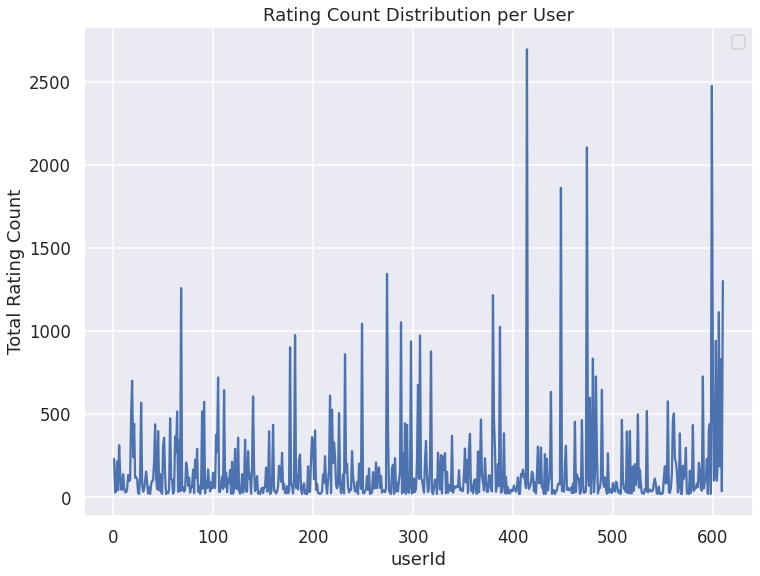

In [100]:
def ratings_per_user(ratings):
  # count the number of ratings given by each user\
  total_ratings_per_user = ratings.groupby('userId')['rating'].count()
  total_ratings_per_user_df = total_ratings_per_user.to_frame()
  total_ratings_per_user_df.reset_index(inplace=True)
  return total_ratings_per_user_df

total_ratings_per_user_df = ratings_per_user(ratings)
userID = total_ratings_per_user_df['userId']
rating_count = total_ratings_per_user_df['rating']
# Simple Line Plot for Rating count distribution for each user
plt.figure(figsize=(12,9))
plt.plot(userID, rating_count)
plt.xlabel('userId')
plt.ylabel('Total Rating Count')
plt.title('Rating Count Distribution per User')
plt.legend()
plt.show()

Bar Plot for the Top 15 Users with the highest Number of Rated Movies

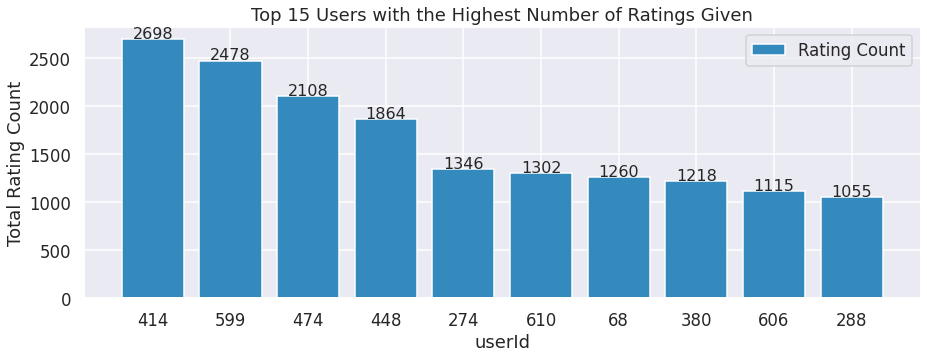

In [101]:
sorted_df = pd.DataFrame(total_ratings_per_user_df.sort_values(by='rating', ascending=False).reset_index(drop=True)[:10])
# sorted_df
userID_list = sorted_df['userId'].to_list()
ratings_list = sorted_df['rating'].to_list()
# plot for x-axis as userId, y-axis as total rating count
x_pos = np.arange(len(userID_list))
# x_pos
plt.figure(figsize=(15,5))
plt.xticks(x_pos, userID_list)
plt.bar(x_pos, ratings_list, label = 'Rating Count', color = '#348ABD')
# pale yellow:#feffb3 dark yello: #ffed6f nice blue: #348ABD pale green: #8dd3c7
plt.xlabel('userId')
plt.ylabel('Total Rating Count')
plt.title('Top 15 Users with the Highest Number of Ratings Given')
plt.legend()
# create a for loop to enumerate the bar plot with the rating count of the displayed users
for i, val in enumerate(ratings_list):
  plt.text(i, val+10, s=val, fontsize=16, horizontalalignment= 'center')
plt.show()

**WordCloud for Genres with the Highest Number of Movies (with overlap)**

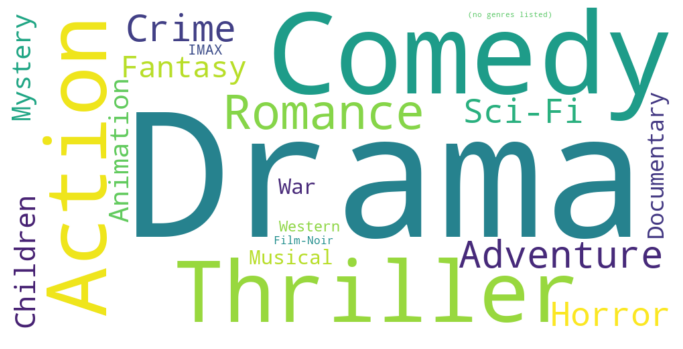

In [102]:
eda.wordcloud_genres(genre_data = movies.genres)

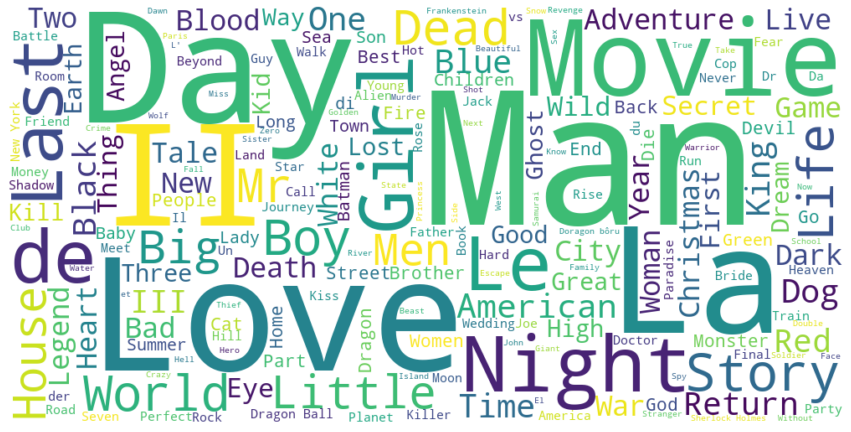

In [103]:
eda.wordcloud_titles(movie_titles = movies['title'])

In [104]:
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()

movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

movies_average_rating=movies_merged_df.groupby(
    'title')['rating'].mean().sort_values(
        ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.sample(5)

movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.sample(5)

,title,Rating Count,Average Rating
1660,"Wedding Banquet, The (Xi yan) (1993)",1,4.500
638,Frankenstein (2015),1,2.000
4788,Bus 174 (Ônibus 174) (2002),3,3.833
4126,Project A ('A' gai waak) (1983),2,4.000
6114,"Prince of Tides, The (1991)",5,3.400


In [105]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

count   100836.000
mean        58.759
std         61.965
min          1.000
25%         13.000
50%         39.000
75%         84.000
max        329.000
Name: Rating Count, dtype: float64


,movieId,title,genres,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.000,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.000,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.500,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.500,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.500,1305696483,215


## Building a content based recommender

For the post, we will be building a fairly simple recommender, based on the movie genres. A fairly common approach is to use a tf-idf vectorizer. 

While this approach is more commonly used on a text corpus, it possesses some interesting properties that will be useful in order to obtain a vector representation of the data. The expression is defined as follows:

Where we have the product of the term frequency, i.e. the amount of times a given term (genre) occurs in a document (genres of a movie), times the right side factor, which basically scales the term frequency depending on the amount of times a given term appears in all documents (movies).

The lesser the amount of movies that contain a given genre (df_i), the higher the resulting weight. The logarithm is basically to smoothen the result of the division, i.e. avoids huge differences as a result of the right hand term.

As already mentioned, tf-idf will help capture the important genres of each movie by giving a higher weight to the less frequent genres, which we woulnd't get with say, CountVectorizer .

To obtain the tf-idf vectors I'll be using sklearn's TfidfVectorizer . However, we have to take into account some aspects particular to this problem. The usual setup when dealing with text data, is to set a word analyser and perhaps an ngram_range , which will also include the n-grams within the specified range. An example would be:

In [106]:
analyzer=lambda s: (c for i in range(1,4) for c in combinations(s.split('|'), r=i))
TF_iDF = TfidfVectorizer(analyzer = analyzer)
BoW = CountVectorizer(analyzer = analyzer)
tfidf_matrix = TF_iDF.fit_transform(movies['genres'])
BoW_matrix = BoW.fit_transform(movies['genres'])
print("tfidf_matrix",tfidf_matrix.shape)
print("BoW_matrix",BoW_matrix.shape)

tfidf_matrix (9742, 783)
BoW_matrix (9742, 783)


<h2> Similarity between vectors </h2>

The next step will be to find similar vectors (movies). Recall that we've encoded each movie's genre into its tf-idf representation, now we want to define a proximity measure. A commonly used measure is the cosine similarity. 

This similarity measure owns its name to the fact that it equals to the cosine of the angle between the two vectors being compared. The lower the angle between two vectors, the higher the cosine will be, hence yielding a higher similarity factor. It is expressed as follows ([source](https://en.wikipedia.org/wiki/Cosine_similarity)):

In [107]:
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)
cosine_sim_df_TFiDF = pd.DataFrame(cosine_sim_tfidf, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_df_TFiDF.shape)
cosine_sim_df_TFiDF.sample(5, axis=1).round(2)

Shape: (9742, 9742)


title,Robots (2005),Intact (Intacto) (2001),Fear of a Black Hat (1994),Michael (1996),"Island of Dr. Moreau, The (1996)"
title,,,,,
Toy Story (1995),0.500,0.000,0.080,0.090,0.000
Jumanji (1995),0.240,0.000,0.000,0.070,0.000
Grumpier Old Men (1995),0.020,0.000,0.400,0.300,0.000
Waiting to Exhale (1995),0.010,0.000,0.240,0.500,0.000
Father of the Bride Part II (1995),0.040,0.000,1.000,0.120,0.000
...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.150,0.000,0.110,0.120,0.000
No Game No Life: Zero (2017),0.240,0.000,0.170,0.190,0.000
Flint (2017),0.000,0.000,0.000,0.110,0.000


In [108]:
cosine_sim_BoW = cosine_similarity(BoW_matrix)
cosine_sim_df_BoW = pd.DataFrame(cosine_sim_BoW, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_df_BoW.shape)
cosine_sim_df_BoW.sample(5, axis=1).round(2)

Shape: (9742, 9742)


title,Belladonna of Sadness (1973),"Wizard of Oz, The (1939)","Evil Dead, The (1981)",I Am Sam (2001),Tangled Ever After (2012)
title,,,,,
Toy Story (1995),0.230,0.370,0.080,0.000,0.230
Jumanji (1995),0.140,0.710,0.140,0.000,0.140
Grumpier Old Men (1995),0.000,0.000,0.000,0.000,0.000
Waiting to Exhale (1995),0.140,0.000,0.000,0.380,0.000
Father of the Bride Part II (1995),0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.300,0.070,0.100,0.000,0.300
No Game No Life: Zero (2017),0.430,0.100,0.140,0.000,0.140
Flint (2017),0.380,0.000,0.000,1.000,0.000


Now we have to define some logic to find the highest weights or tf-idf scores for a given movie. For that I've defined the following function, which takes as input a given movie i, the similarity matrix M, the items dataframe and returns up to k recommendations:

In [109]:
def genre_recommendations(movie_name, M, items, k=5):
    """
    Recommends movies based on a similarity dataframe

    Parameters
    ----------
    movie_name : str
        Movie (index of the similarity dataframe)
    M : pd.DataFrame
        Similarity dataframe, symmetric, with movies as indices and columns
    items : pd.DataFrame
        Contains both the title and some other features used to define similarity
    k : int
        Amount of recommendations to return

    """
    ix = M.loc[:,movie_name].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(movie_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

#### Testing the recommender

Let's test the recommender with a few examples. Since the movies dataset contains movies up to 2000, we will have to be using some old time classics.

How about `'2001: A Space Odyssey'`?

In [110]:
movies[movies.title.eq('2001: A Space Odyssey (1968)')]

,movieId,title,genres,release_year,genres_split
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,1968,"[Adventure, Drama, Sci-Fi]"


In [111]:
# Using TFiDF
genre_recommendations('2001: A Space Odyssey (1968)', cosine_sim_df_TFiDF, movies[['title', 'genres']])

,title,genres
0,A.I. Artificial Intelligence (2001),Adventure|Drama|Sci-Fi
1,"20,000 Leagues Under the Sea (1954)",Adventure|Drama|Sci-Fi
2,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi
3,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi
4,The Martian (2015),Adventure|Drama|Sci-Fi


In [112]:
# Using BoW
genre_recommendations('2001: A Space Odyssey (1968)', cosine_sim_df_BoW, movies[['title', 'genres']])

,title,genres
0,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi
1,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi
2,The Martian (2015),Adventure|Drama|Sci-Fi
3,A.I. Artificial Intelligence (2001),Adventure|Drama|Sci-Fi
4,Enemy Mine (1985),Adventure|Drama|Sci-Fi


As expected, the most similar movies are those which share the most genres. Interestingly, we see that most of them are Sci-Fi movies. Note that this is likely to be influenced by the fact that Sci-Fi will mostly have the higher score among the genres that appear above, since it is the least frequent and hence has a higher weight.

In [113]:
print(movies[movies.title.eq('Contact (1997)')])
genre_recommendations('Contact (1997)', cosine_sim_df_TFiDF, movies[['title', 'genres']])

      movieId           title        genres  release_year     genres_split
1187     1584  Contact (1997)  Drama|Sci-Fi          1997  [Drama, Sci-Fi]


,title,genres
0,SORI: Voice from the Heart (2016),Drama|Sci-Fi
1,Monsters (2010),Drama|Sci-Fi
2,Primer (2004),Drama|Sci-Fi
3,"Brother from Another Planet, The (1984)",Drama|Sci-Fi
4,Babylon 5: Thirdspace (1998),Drama|Sci-Fi


Overall, we've seen that quite a naive content based recommendation as the reviewed can provide fairly good recommendations.

A clear advantage of content based recommendations is that they don't suffer from the cold-start problem, since we only need basic information on a user (in this case a single movie) to provide similar recommendations based based on the items. Another interesting advantage is that we are able to recommend to users with unique tastes, as well as new an unpopular items.

An important drawback however is that it tends to recommend the same type of items to the user. In order to be able to recommend a different type of item, the user would have to have rated or show interest in the new type of item. This is a problem that Collaborative Filtering methods don't have, since the match here is done between neighbouring users with similar tastes, but different items rated.

## Collaborative Filtering
### Model-Based Collaborative Filtering Using SVD and KNN

In [1]:
pip install surprise

In [116]:
# Load the movies dataset
movies = pd.read_csv(path+'movies.csv')
# Load the ratings dataset
ratings = pd.read_csv(path+'ratings.csv', usecols=['userId', 'movieId', 'rating'])
#tags = pd.read_csv(path+'tags.csv')

In [117]:
ratings_movies = pd.merge(movies, ratings, on='movieId')
# Drop userId column
#ratings_movies = ratings_movies.drop(columns=['genres', 'title'])

In [118]:
# use in-build functions in Surprise library to read and load ratings data
reader = Reader()
ratings_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [119]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBasic(), KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, ratings_data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [120]:
# display the results of the 3-fold cross validation
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results   
# svd is best because it gives the least rmse on test data

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.872,4.060,0.160
KNNWithMeans,0.896,0.142,1.522
KNNBasic,0.947,0.114,1.362


Make Recommendations using Best Model

In [122]:
# function for to generate recommendation using best model
def recommend_by_model(algo_name, userid, rating_data, all_ratings, main_data):
    algo = algo_name()
    prev_movies = all_ratings[all_ratings['userId']==userid]
#     prev_movies = prev_movies.set_index(prev_movies['movieId']).reset_index(drop=True)
    prev_movies = prev_movies.reset_index(drop=True)
#     prev_movies
    train_data = rating_data.build_full_trainset()
    algo.fit(train_data)
    excluded_data = pd.merge(all_ratings, prev_movies, how='left')
    excluded_data = excluded_data.reset_index(drop=True)
    excluded_data['estimated rating'] = excluded_data['movieId'].apply(lambda x: algo.predict(userid, x).est)
    excluded_data = excluded_data.sort_values(by='estimated rating', ascending=False)
    excluded_data = excluded_data.reset_index(drop=True)
    final_recc = pd.merge(main_data, excluded_data, how='right')
    final_recc = final_recc[final_recc['estimated rating']>=4.0]
    final_recc = final_recc[final_recc['rating']>=4.0]
    final_recc = final_recc.drop_duplicates(subset='movieId').reset_index()
    final_recc = final_recc.drop(columns='index')
    print('Recommended Movies for user', userid, 'are:')
    return final_recc[:5]

In [123]:
data = pd.merge(movies, ratings, on='movieId')

In [124]:
# generate recommendations based on the estimated ratings of a particular user (userId = 435)
recommend_by_model(SVD, 435, ratings_data, ratings, data)

Recommended Movies for user 435 are:


,movieId,title,genres,userId,rating,estimated rating
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,332,4.500,5.000
1,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,425,4.500,4.895
2,1204,Lawrence of Arabia (1962),Adventure|Drama|War,384,5.000,4.890
3,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,387,4.000,4.886
4,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,29,4.500,4.883


## Recommender System Framework

>Create a framework for recommender system and compare content based, collaboartive based and hybrid recommender systems.

In [5]:
np.random.seed(0)
random.seed(0)

In [6]:
# Upload the data for surprise
ml = MovieLens()

In [7]:
# Loading movie ratings
evaluationData = ml.loadMovieLensLatestSmall()
# Computing movie popularity ranks so we can measure novelty later
rankings = ml.getPopularityRanks()

In [8]:
# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


#### Evaluate content based recommender using KNN

In [30]:
# Evaluate content based recommender using KNN
contentKNN = ContentKNNAlgorithm()
evaluator.AddAlgorithm(contentKNN, "ContentKNN")
evaluator.Evaluate(False)

Evaluating  ContentKNN ...
Evaluating accuracy...
Computing content-based similarity matrix...
0  of  8211
100  of  8211
200  of  8211
300  of  8211
400  of  8211
500  of  8211
600  of  8211
700  of  8211
800  of  8211
900  of  8211
1000  of  8211
1100  of  8211
1200  of  8211
1300  of  8211
1400  of  8211
1500  of  8211
1600  of  8211
1700  of  8211
1800  of  8211
1900  of  8211
2000  of  8211
2100  of  8211
2200  of  8211
2300  of  8211
2400  of  8211
2500  of  8211
2600  of  8211
2700  of  8211
2800  of  8211
2900  of  8211
3000  of  8211
3100  of  8211
3200  of  8211
3300  of  8211
3400  of  8211
3500  of  8211
3600  of  8211
3700  of  8211
3800  of  8211
3900  of  8211
4000  of  8211
4100  of  8211
4200  of  8211
4300  of  8211
4400  of  8211
4500  of  8211
4600  of  8211
4700  of  8211
4800  of  8211
4900  of  8211
5000  of  8211
5100  of  8211
5200  of  8211
5300  of  8211
5400  of  8211
5500  of  8211
5600  of  8211
5700  of  8211
5800  of  8211
5900  of  8211
6000  of  8211
61

In [31]:
# Obtain the top recommendation for a test sample
evaluator.SampleTopNRecs(ml)


Using recommender  ContentKNN

Building recommendation model...
Computing content-based similarity matrix...
0  of  9066
100  of  9066
200  of  9066
300  of  9066
400  of  9066
500  of  9066
600  of  9066
700  of  9066
800  of  9066
900  of  9066
1000  of  9066
1100  of  9066
1200  of  9066
1300  of  9066
1400  of  9066
1500  of  9066
1600  of  9066
1700  of  9066
1800  of  9066
1900  of  9066
2000  of  9066
2100  of  9066
2200  of  9066
2300  of  9066
2400  of  9066
2500  of  9066
2600  of  9066
2700  of  9066
2800  of  9066
2900  of  9066
3000  of  9066
3100  of  9066
3200  of  9066
3300  of  9066
3400  of  9066
3500  of  9066
3600  of  9066
3700  of  9066
3800  of  9066
3900  of  9066
4000  of  9066
4100  of  9066
4200  of  9066
4300  of  9066
4400  of  9066
4500  of  9066
4600  of  9066
4700  of  9066
4800  of  9066
4900  of  9066
5000  of  9066
5100  of  9066
5200  of  9066
5300  of  9066
5400  of  9066
5500  of  9066
5600  of  9066
5700  of  9066
5800  of  9066
5900  of  9066
60

In [34]:
# Tune the CVD model
print("Searching for best parameters...")
param_grid = {'n_epochs': [20, 30], 'lr_all': [0.005, 0.010],
              'n_factors': [50, 100]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(evaluationData)

# best RMSE score
print("Best RMSE score attained: ", gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Searching for best parameters...
Best RMSE score attained:  0.8927156021493916
{'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 50}


In [ ]:
# Construct an Evaluator to evaluate them
evaluator = Evaluator(evaluationData, rankings)
params = gs.best_params['rmse']
SVD = SVD(n_epochs = params['n_epochs'], lr_all = params['lr_all'], n_factors = params['n_factors'])
evaluator.AddAlgorithm(SVD, "SVD")


evaluator.Evaluate(False)

evaluator.SampleTopNRecs(ml)

## Hybrid RS

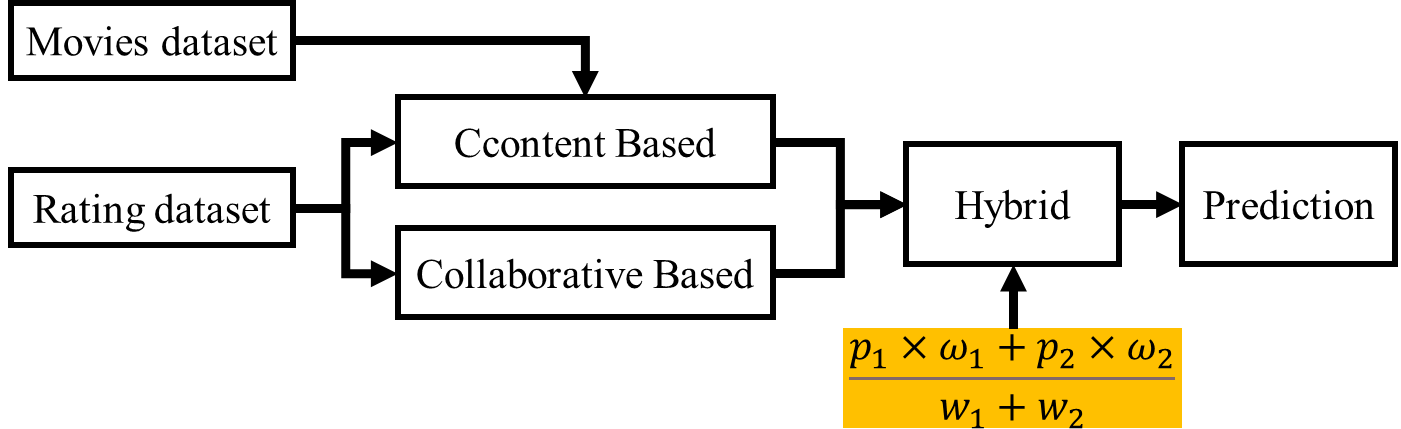

In [11]:
#Content
ContentKNN = ContentKNNAlgorithm()
# Collabortive
SVD = SVD()
#Combine them
Hybrid = HybridAlgorithm([SVD, ContentKNN], [0.5, 0.5])

# Now we can evaluate the models together:

# Add the SVD model
evaluator.AddAlgorithm(SVD, "SVD")
# Add the content based model
evaluator.AddAlgorithm(ContentKNN, "ContentKNN")
# Add the hybrid model
evaluator.AddAlgorithm(Hybrid, "Hybrid")


evaluator.Evaluate(True)

evaluator.SampleTopNRecs(ml)

Evaluating  SVD ...
Evaluating accuracy...
Evaluating top-N with leave-one-out...
Computing hit-rate and rank metrics...
Computing recommendations with full data set...
Analyzing coverage, diversity, and novelty...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Analysis complete.
Evaluating  ContentKNN ...
Evaluating accuracy...
Computing content-based similarity matrix...
0  of  8211
100  of  8211
200  of  8211
300  of  8211
400  of  8211
500  of  8211
600  of  8211
700  of  8211
800  of  8211
900  of  8211
1000  of  8211
1100  of  8211
1200  of  8211
1300  of  8211
1400  of  8211
1500  of  8211
1600  of  8211
1700  of  8211
1800  of  8211
1900  of  8211
2000  of  8211
2100  of  8211
2200  of  8211
2300  of  8211
2400  of  8211
2500  of  8211
2600  of  8211
2700  of  8211
2800  of  8211
2900  of  8211
3000  of  8211
3100  of  8211
3200  of  8211
3300  of  8211
3400  of  8211
3500  of  8211
3600  of  8211
3700  of  8211
3800  of  8211
3900  of  8211
4000  o

3800  of  9066
3900  of  9066
4000  of  9066
4100  of  9066
4200  of  9066
4300  of  9066
4400  of  9066
4500  of  9066
4600  of  9066
4700  of  9066
4800  of  9066
4900  of  9066
5000  of  9066
5100  of  9066
5200  of  9066
5300  of  9066
5400  of  9066
5500  of  9066
5600  of  9066
5700  of  9066
5800  of  9066
5900  of  9066
6000  of  9066
6100  of  9066
6200  of  9066
6300  of  9066
6400  of  9066
6500  of  9066
6600  of  9066
6700  of  9066
6800  of  9066
6900  of  9066
7000  of  9066
7100  of  9066
7200  of  9066
7300  of  9066
7400  of  9066
7500  of  9066
7600  of  9066
7700  of  9066
7800  of  9066
7900  of  9066
8000  of  9066
8100  of  9066
8200  of  9066
8300  of  9066
8400  of  9066
8500  of  9066
8600  of  9066
8700  of  9066
8800  of  9066
8900  of  9066
9000  of  9066
...done.
Analyzing coverage, diversity, and novelty...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Analysis complete.


Algorithm  RMSE       MAE        HR         cHR      